## Import Functions, Modules

In [2]:
#import from my modules:
import als_model_v2 as am
from ensemble_helper_functions import load_files, merge_data
import rank_eval

In [3]:
#import from python modules:
import cPickle as pickle
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

## Open cleaned_df

In [3]:
with open ('30OCT17_finalfitmodelsv2/cleaned_df.pkl', 'rb') as f:
    cleaned_data = pickle.load(f)

In [4]:
cleaned_data['SeriesID'].unique()

array([ 2.,  1.,  3.,  0.,  4.])

## Instantiate Class Instances for ALS Model, Prep and Run for the Following:

#### For each of these features:
- SeriesID
- EventTypeID
- Venue (based on zip code)
- Total Average Fee
- Average Mileage

#### Run best fit model identified from exercise in Pipeline_v2-noTVS notebook on train+validate larger dataset; check rank metric on test set

#### Initial Prep:

In [5]:
als_model = am.implicit_als(cleaned_data, split_val=False)
#setting split_val to False results in the split being train/test instead of train/val/test
#80% of data is in train and 20% is in test

In [6]:
als_model.prep_full_df()

In [7]:
als_model.full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925704 entries, 0 to 925703
Data columns (total 9 columns):
PersonID         925704 non-null int64
EventID          925704 non-null int64
Participated     925704 non-null int64
Event_Date       925704 non-null datetime64[ns]
SeriesID         925704 non-null float64
EventTypeID      925704 non-null int64
Total_Fee_Avg    925704 non-null int64
Miles2_Avg       925704 non-null int64
Venue_Zip        925704 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 63.6 MB


In [8]:
als_model.train_val_test_split_byseries()

TrainVal Size: 740562.0
Train Size: 592449.0
Validation Size: 148113.0
Test Size: 185142.0


## SeriesID

In [9]:
als_model.print_train_val_test_info("SeriesID")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


SeriesID in train: 5
SeriesID in validate: 5
SeriesID in test: 5


SeriesID in both train & validate: 5
SeriesID in both train & test: 5


In [10]:
als_model.create_participate_matrices("SeriesID")

In [11]:
als_model.fit_ALS(itemCol="SeriesID", rank=5, alpha=80, coldStartStrategy="drop")

In [12]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "SeriesID")

Trainval predictions includes 740562 valid values and 0 nan values
Test predictions includes 185142 valid values and 0 nan values
Trainval Model Rank = 4.58523682184 and Popular Rank = 24.4891391794
Test Model Rank = 6.60411776394 and Popular Rank = 27.4009077156


In [13]:
als_fit_model_series = als_model.base_model
als_trainvalpreds_pd_series = trainval_predictions
als_testpreds_pd_series = test_predictions

als_fit_model_series.save("30OCT17_finalfitmodelsv2/als_fit_model_series")

with open ("30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_series.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_series, f)
with open ('30OCT17_finalfitmodelsv2/als_testpreds_pd_series.pkl', 'w') as f:
    pickle.dump(als_testpreds_pd_series, f)

In [14]:
#these only need to be saved once today:
als_trainval_df_pd = als_model.trainval
als_test_df_pd = als_model.test

In [15]:
with open ("30OCT17_finalfitmodelsv2/als_trainval_df_pd.pkl", 'w') as f:
    pickle.dump(als_trainval_df_pd, f)
    
with open ("30OCT17_finalfitmodelsv2/als_test_df_pd.pkl", 'w') as f:
    pickle.dump(als_test_df_pd, f)

## EventTypeID

In [16]:
als_model.print_train_val_test_info("EventTypeID")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


EventTypeID in train: 2
EventTypeID in validate: 2
EventTypeID in test: 2


EventTypeID in both train & validate: 2
EventTypeID in both train & test: 2


In [17]:
als_model.create_participate_matrices("EventTypeID")

In [18]:
als_model.fit_ALS(itemCol="EventTypeID", rank=30, alpha=80, coldStartStrategy="drop")

In [19]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "EventTypeID")

Trainval predictions includes 740562 valid values and 0 nan values
Test predictions includes 185142 valid values and 0 nan values
Trainval Model Rank = 0.00611124690217 and Popular Rank = 6.39215973086
Test Model Rank = 0.445481959023 and Popular Rank = 8.15431164902


In [20]:
als_fit_model_eventtype = als_model.base_model
als_trainvalpreds_pd_eventtype = trainval_predictions
als_testpreds_pd_eventtype = test_predictions

als_fit_model_eventtype.save("30OCT17_finalfitmodelsv2/als_fit_model_eventtype")

with open ("30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_eventtype.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_eventtype, f)
with open ("30OCT17_finalfitmodelsv2/als_testpreds_pd_eventtype.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_eventtype, f)

## Venue (Based on Zipcode)

In [21]:
als_model.print_train_val_test_info("Venue_Zip")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


Venue_Zip in train: 22
Venue_Zip in validate: 16
Venue_Zip in test: 16


Venue_Zip in both train & validate: 14
Venue_Zip in both train & test: 14


In [22]:
als_model.create_participate_matrices("Venue_Zip")

In [23]:
als_model.fit_ALS(itemCol="Venue_Zip", rank=5, alpha=80, coldStartStrategy="drop")

In [25]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "Venue_Zip")

Trainval predictions includes 740562 valid values and 0 nan values
Test predictions includes 174378 valid values and 0 nan values
Trainval Model Rank = 5.77703983701 and Popular Rank = 24.4243521295
Test Model Rank = 18.2570043929 and Popular Rank = 29.3631562597


In [26]:
als_fit_model_zipcode = als_model.base_model
als_trainvalpreds_pd_zipcode = trainval_predictions
als_testpreds_pd_zipcode = test_predictions

als_fit_model_zipcode.save("30OCT17_finalfitmodelsv2/als_fit_model_zipcode")

with open ("30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_zipcode.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_zipcode, f)
with open ("30OCT17_finalfitmodelsv2/als_testpreds_pd_zipcode.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_zipcode, f)

## Total Average Fee

In [27]:
als_model.print_train_val_test_info("Total_Fee_Avg")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


Total_Fee_Avg in train: 21
Total_Fee_Avg in validate: 11
Total_Fee_Avg in test: 12


Total_Fee_Avg in both train & validate: 9
Total_Fee_Avg in both train & test: 8


In [28]:
als_model.create_participate_matrices("Total_Fee_Avg")

In [29]:
als_model.fit_ALS(itemCol="Total_Fee_Avg", rank=5, alpha=80, coldStartStrategy="drop")

In [30]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "Total_Fee_Avg")

Trainval predictions includes 740562 valid values and 0 nan values
Test predictions includes 152850 valid values and 0 nan values
Trainval Model Rank = 6.80604340348 and Popular Rank = 27.7646520117
Test Model Rank = 15.5240758319 and Popular Rank = 26.0542106352


In [31]:
als_fit_model_avgfee = als_model.base_model
als_trainvalpreds_pd_avgfee = trainval_predictions
als_testpreds_pd_avgfee = test_predictions

als_fit_model_avgfee.save("30OCT17_finalfitmodelsv2/als_fit_model_avgfee")

with open ("30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_avgfee.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_avgfee, f)

with open ("30OCT17_finalfitmodelsv2/als_testpreds_pd_avgfee.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_avgfee, f)

## Average Mileage

In [32]:
als_model.print_train_val_test_info("Miles2_Avg")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


Miles2_Avg in train: 11
Miles2_Avg in validate: 7
Miles2_Avg in test: 10


Miles2_Avg in both train & validate: 5
Miles2_Avg in both train & test: 8


In [33]:
als_model.create_participate_matrices("Miles2_Avg")

In [34]:
als_model.fit_ALS(itemCol="Miles2_Avg", rank=5, alpha=80, coldStartStrategy="drop")

In [35]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "Miles2_Avg")

Trainval predictions includes 740562 valid values and 0 nan values
Test predictions includes 174378 valid values and 0 nan values
Trainval Model Rank = 3.45770768142 and Popular Rank = 24.0518934002
Test Model Rank = 14.0993853022 and Popular Rank = 22.8537346946


In [36]:
als_fit_model_avgmile = als_model.base_model
als_trainvalpreds_pd_avgmile = trainval_predictions
als_testpreds_pd_avgmile = test_predictions

als_fit_model_avgmile.save("30OCT17_finalfitmodelsv2/als_fit_model_avgmile")

with open ("30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_avgmile.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_avgmile, f)
with open ("30OCT17_finalfitmodelsv2/als_testpreds_pd_avgmile.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_avgmile, f)

## Build Gradient Boost Ensemble Using ALS Models Predictions as Inputs to Determine Weights for Each

#### Build X, y Train Matrices for GB Model; Split between Train and Validate

In [37]:
data_df = load_files('30OCT17_finalfitmodelsv2/als_trainval_df_pd.pkl')
fee_preds = load_files('30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_avgfee.pkl')
mile_preds = load_files('30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_avgmile.pkl')
type_preds = load_files('30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_eventtype.pkl')
series_preds = load_files('30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_series.pkl')
zipcode_preds = load_files('30OCT17_finalfitmodelsv2/als_trainvalpreds_pd_zipcode.pkl')

In [38]:
data_df['Event_Date'] = data_df['Event_Date'].astype('int64')//1e9

In [39]:
data_df['Event_Date'] = data_df['Event_Date'] * 1000000000

In [40]:
data_df.head()

,PersonID,EventID,Participated,Event_Date,SeriesID,EventTypeID,Total_Fee_Avg,Miles2_Avg,Venue_Zip
53820,1,13,0,1426291200000000000,0.0,1,37,8,98038
60991,7327,13,0,1426291200000000000,0.0,1,37,8,98038
60992,7328,13,0,1426291200000000000,0.0,1,37,8,98038
60993,7329,13,0,1426291200000000000,0.0,1,37,8,98038
60994,7330,13,0,1426291200000000000,0.0,1,37,8,98038


In [41]:
series_preds.head()

,PersonID,SeriesID,Participated,Event_Date,prediction
0,148,1.0,0,1420329600000000000,0.998855
1,148,1.0,0,1422057600000000000,0.998855
2,148,1.0,0,1423267200000000000,0.998855
3,148,1.0,1,1446854400000000000,0.998855
4,148,1.0,1,1448064000000000000,0.998855


In [42]:
predictions = [(series_preds, 'SeriesID'), (type_preds, 'EventTypeID'), 
               (zipcode_preds, 'Venue_Zip'), (fee_preds, 'Total_Fee_Avg'), 
               (mile_preds, 'Miles2_Avg')]

gb_train_data = data_df.copy()

for item in predictions:
    gb_train_data = merge_data(gb_train_data, item[0], item[1])

In [43]:
gb_train_data.sort_values(by='Event_Date', axis=0, ascending=True, inplace=True)

In [44]:
gb_train_data.reset_index(drop=True, inplace=True)

In [45]:
gb_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740562 entries, 0 to 740561
Data columns (total 9 columns):
PersonID                    740562 non-null int64
EventID                     740562 non-null int64
Participated                740562 non-null int64
Event_Date                  740562 non-null int64
SeriesID_prediction         740562 non-null float64
EventTypeID_prediction      740562 non-null float64
Venue_Zip_prediction        740562 non-null float64
Total_Fee_Avg_prediction    740562 non-null float64
Miles2_Avg_prediction       740562 non-null float64
dtypes: float64(5), int64(4)
memory usage: 50.9 MB


No NAN values to fill in since this is the predictions on the training data (no cold starts)

In [46]:
len(gb_train_data)*.8, len(gb_train_data)*.2

(592449.6, 148112.4)

Split data on first 592450 records for train (sorted by event_date as timestamp) and last 148113 records for test

In [47]:
X_gb_train = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[:592450].copy()

In [48]:
y_gb_train = gb_train_data['Participated'].iloc[:592450].copy()

In [49]:
len(X_gb_train), len(y_gb_train)

(592450, 592450)

In [50]:
X_gb_val = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[592450:].copy()

In [51]:
y_gb_val = gb_train_data['Participated'].iloc[592450:].copy()

In [52]:
len(X_gb_val), len(y_gb_val)

(148112, 148112)

In [53]:
with open('30OCT17_finalfitmodelsv2/gb_train_data.pkl', 'w') as f:
    pickle.dump(gb_train_data, f)

#### Build X, y Test Matrices for GB Model

In [63]:
test_data_df = load_files('30OCT17_finalfitmodelsv2/als_test_df_pd.pkl')
test_fee_preds = load_files('30OCT17_finalfitmodelsv2/als_testpreds_pd_avgfee.pkl')
test_mile_preds = load_files('30OCT17_finalfitmodelsv2/als_testpreds_pd_avgmile.pkl')
test_type_preds = load_files('30OCT17_finalfitmodelsv2/als_testpreds_pd_eventtype.pkl')
test_series_preds = load_files('30OCT17_finalfitmodelsv2/als_testpreds_pd_series.pkl')
test_zipcode_preds = load_files('30OCT17_finalfitmodelsv2/als_testpreds_pd_zipcode.pkl')

In [64]:
test_data_df['Event_Date'] = test_data_df['Event_Date'].astype('int64')//1e9

In [65]:
test_data_df['Event_Date'] = test_data_df['Event_Date'] * 1000000000

In [66]:
test_predictions = [(test_series_preds, 'SeriesID'), (test_type_preds, 'EventTypeID'), 
               (test_zipcode_preds, 'Venue_Zip'), (test_fee_preds, 'Total_Fee_Avg'), 
               (test_mile_preds, 'Miles2_Avg')]

gb_test_data = test_data_df.copy()

for item in test_predictions:
    gb_test_data = merge_data(gb_test_data, item[0], item[1])

In [67]:
gb_test_data.sort_values(by='Event_Date', axis=0, ascending=True, inplace=True)

In [68]:
gb_test_data.reset_index(drop=True, inplace=True)

In [69]:
gb_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185142 entries, 0 to 185141
Data columns (total 9 columns):
PersonID                    185142 non-null int64
EventID                     185142 non-null int64
Participated                185142 non-null int64
Event_Date                  185142 non-null int64
SeriesID_prediction         185142 non-null float64
EventTypeID_prediction      185142 non-null float64
Venue_Zip_prediction        174378 non-null float64
Total_Fee_Avg_prediction    152850 non-null float64
Miles2_Avg_prediction       174378 non-null float64
dtypes: float64(5), int64(4)
memory usage: 12.7 MB


In [70]:
#need to fill nan values for and Fee and Mile Predictions (caused by cold starts during ALS modeling)
gb_test_data['Total_Fee_Avg_prediction'] = gb_test_data['Total_Fee_Avg_prediction'].apply(
                            lambda x: gb_test_data['Total_Fee_Avg_prediction'].mean() if pd.isnull(x) else x)
gb_test_data['Miles2_Avg_prediction'] = gb_test_data['Miles2_Avg_prediction'].apply(
                            lambda x: gb_test_data['Miles2_Avg_prediction'].mean() if pd.isnull(x) else x)
gb_test_data['Venue_Zip_prediction'] = gb_test_data['Venue_Zip_prediction'].apply(
                            lambda x: gb_test_data['Venue_Zip_prediction'].mean() if pd.isnull(x) else x)

In [71]:
gb_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185142 entries, 0 to 185141
Data columns (total 9 columns):
PersonID                    185142 non-null int64
EventID                     185142 non-null int64
Participated                185142 non-null int64
Event_Date                  185142 non-null int64
SeriesID_prediction         185142 non-null float64
EventTypeID_prediction      185142 non-null float64
Venue_Zip_prediction        185142 non-null float64
Total_Fee_Avg_prediction    185142 non-null float64
Miles2_Avg_prediction       185142 non-null float64
dtypes: float64(5), int64(4)
memory usage: 12.7 MB


In [72]:
X_gb_test = gb_test_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].copy()

In [73]:
y_gb_test = gb_test_data['Participated'].copy()

In [74]:
len(X_gb_test), len(y_gb_test)

(185142, 185142)

In [75]:
with open('30OCT17_finalfitmodelsv2/gb_test_data.pkl', 'w') as f:
    pickle.dump(gb_test_data, f)

## Train Gradient Boosted Regressor out of the box using prepared data

In [76]:
with open('30OCT17_finalfitmodelsv2/gb_train_data.pkl', 'rb') as f:
    gb_train_data = pickle.load(f)
with open('30OCT17_finalfitmodelsv2/gb_test_data.pkl', 'rb') as f:
    gb_test_data = pickle.load(f)

In [77]:
X_gb_train = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[:592450].copy()

In [78]:
y_gb_train = gb_train_data['Participated'].iloc[:592450].copy()

In [79]:
len(X_gb_train), len(y_gb_train)

(592450, 592450)

In [80]:
X_gb_val = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[592450:].copy()

In [81]:
y_gb_val = gb_train_data['Participated'].iloc[592450:].copy()

In [82]:
len(X_gb_val), len(y_gb_val)

(148112, 148112)

In [83]:
X_gb_test = gb_test_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].copy()

In [84]:
y_gb_test = gb_test_data['Participated'].copy()

In [85]:
len(X_gb_test), len(y_gb_test)

(185142, 185142)

In [86]:
gb_model = GradientBoostingRegressor()

In [87]:
gb_model.fit(X_gb_train, y_gb_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [88]:
gb_model.score(X_gb_val, y_gb_val) #this uses r^2 for scoring....not helpful in my situation

0.54077500718086247

The df needs to include columns for user, item, actual outcome, and predicted outcome
    user, item, actual, prediction - strings indicating the name of each column in
    the predictions file for use in the function

In [89]:
gb_valpreds = gb_model.predict(X_gb_val)

In [90]:
len(gb_valpreds)

148112

In [91]:
len(y_gb_val)

148112

In [92]:
rankeval_valpreds_df = pd.DataFrame({'PersonID': gb_train_data['PersonID'].iloc[592450:], 'EventID': 
                                      gb_train_data['EventID'].iloc[592450:], 'Participated': y_gb_val.values, 
                                      'prediction': gb_valpreds})

In [93]:
rankeval_valpreds_df.head()

,EventID,Participated,PersonID,prediction
592450,54,0,6187,-0.016080
592451,54,0,6186,-0.001449
592452,54,0,6185,-0.016080
592453,54,0,6184,0.002515
592454,54,0,6183,-0.000764


In [94]:
rank_processing = rank_eval.RankEval(rankeval_valpreds_df, 'PersonID', 'EventID', 'Participated', 'prediction')

In [95]:
rank_processing.calc_test_rank()

9.17053828362614

In [96]:
rank_processing.calc_popular_rank()

31.168005903574944

In [97]:
gb_model.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [98]:
zip(gb_model.feature_importances_, X_gb_train.columns.values)

[(0.12822103583514338, 'SeriesID_prediction'),
 (0.044602920644728962, 'EventTypeID_prediction'),
 (0.37964535958321177, 'Venue_Zip_prediction'),
 (0.31566943607554765, 'Total_Fee_Avg_prediction'),
 (0.13186124786136813, 'Miles2_Avg_prediction')]

## Train Gradient Boosted Regressor with some Params Tweaked:

In [40]:
gb_model_v2 = GradientBoostingRegressor(loss='ls', learning_rate=.01, n_estimators=1000, subsample=0.5, max_depth=10)

In [41]:
gb_model_v2.fit(X_gb_train, y_gb_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=0.5, verbose=0,
             warm_start=False)

In [42]:
gb_valpreds_v2 = gb_model_v2.predict(X_gb_val)

In [43]:
len(gb_valpreds_v2)

148112

In [44]:
len(y_gb_val)

148112

In [45]:
rankeval_valpreds_df_v2 = pd.DataFrame({'PersonID': gb_train_data['PersonID'].iloc[592450:], 'EventID': 
                                      gb_train_data['EventID'].iloc[592450:], 'Participated': y_gb_val.values, 
                                      'prediction': gb_valpreds_v2})

In [46]:
rankeval_valpreds_df_v2.head()

,EventID,Participated,PersonID,prediction
592450,54,0,6187,0.000003
592451,54,0,6186,0.000092
592452,54,0,6185,0.000003
592453,54,0,6184,0.000843
592454,54,0,6183,0.000048


In [47]:
rank_processing_v2 = rank_eval.RankEval(rankeval_valpreds_df_v2, 'PersonID', 'EventID', 'Participated', 'prediction')

In [48]:
rank_processing_v2.calc_test_rank()

11.095651105438394

In [49]:
rank_processing_v2.calc_popular_rank()

31.168005903574944

In [50]:
gb_model_v2.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'presort': 'auto',
 'random_state': None,
 'subsample': 0.5,
 'verbose': 0,
 'warm_start': False}

In [51]:
zip(gb_model_v2.feature_importances_, X_gb_train.columns.values)

[(0.19216645723859813, 'SeriesID_prediction'),
 (0.06345303160088657, 'EventTypeID_prediction'),
 (0.26842207449703265, 'Venue_Zip_prediction'),
 (0.30305325245538689, 'Total_Fee_Avg_prediction'),
 (0.17290518420809492, 'Miles2_Avg_prediction')]

## v5 Gradient Boost Fit - final pick

In [27]:
gb_model_v5 = GradientBoostingRegressor(loss='ls', learning_rate=.01, n_estimators=100, subsample=0.5, max_depth=3)

In [28]:
gb_model_v5.fit(X_gb_train, y_gb_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)

In [29]:
gb_valpreds_v5 = gb_model_v5.predict(X_gb_val)

In [30]:
len(gb_valpreds_v5)

148112

In [31]:
len(y_gb_val)

148112

In [32]:
rankeval_valpreds_df_v5 = pd.DataFrame({'PersonID': gb_train_data['PersonID'].iloc[592450:], 'EventID': 
                                      gb_train_data['EventID'].iloc[592450:], 'Participated': y_gb_val.values, 
                                      'prediction': gb_valpreds_v5})

In [33]:
rankeval_valpreds_df_v5.head()

,EventID,Participated,PersonID,prediction
592450,54,0,6187,0.008400
592451,54,0,6186,0.006768
592452,54,0,6185,0.008400
592453,54,0,6184,0.006768
592454,54,0,6183,0.006768


In [34]:
rank_processing_v5 = rank_eval.RankEval(rankeval_valpreds_df_v5, 'PersonID', 'EventID', 'Participated', 'prediction')

In [35]:
rank_processing_v5.calc_test_rank()

8.1997389456922409

In [36]:
rank_processing_v5.calc_popular_rank()

31.168005903574944

In [37]:
gb_model_v5.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 0.5,
 'verbose': 0,
 'warm_start': False}

In [38]:
zip(gb_model_v5.feature_importances_, X_gb_train.columns.values)

[(0.17172471936131953, 'SeriesID_prediction'),
 (0.01349470094752726, 'EventTypeID_prediction'),
 (0.23567290883736336, 'Venue_Zip_prediction'),
 (0.45778854456874268, 'Total_Fee_Avg_prediction'),
 (0.12131912628504712, 'Miles2_Avg_prediction')]

In [39]:
with open ('30OCT17_finalfitmodelsv2/gb_model_trainfit', 'w') as f:
    pickle.dump(gb_model_v5, f)
with open ('30OCT17_finalfitmodelsv2/gb_valpreds_trainfit', 'w') as f:
    pickle.dump(gb_valpreds_v5, f)

## Refit selected model with train+val data:

In [99]:
X_gb_trainval = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']]

In [100]:
y_gb_trainval = gb_train_data['Participated']

In [101]:
gb_model_final = GradientBoostingRegressor(loss='ls', learning_rate=.01, n_estimators=100, subsample=0.5, max_depth=3)

In [102]:
gb_model_final.fit(X_gb_trainval, y_gb_trainval)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)

In [103]:
gb_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185142 entries, 0 to 185141
Data columns (total 9 columns):
PersonID                    185142 non-null int64
EventID                     185142 non-null int64
Participated                185142 non-null int64
Event_Date                  185142 non-null int64
SeriesID_prediction         185142 non-null float64
EventTypeID_prediction      185142 non-null float64
Venue_Zip_prediction        185142 non-null float64
Total_Fee_Avg_prediction    185142 non-null float64
Miles2_Avg_prediction       185142 non-null float64
dtypes: float64(5), int64(4)
memory usage: 12.7 MB


In [104]:
gb_testpreds_final = gb_model_final.predict(X_gb_test)

In [105]:
len(gb_testpreds_final)

185142

In [106]:
len(y_gb_test)

185142

In [107]:
len(gb_test_data)

185142

In [108]:
rankeval_testpreds_df_final = pd.DataFrame({'PersonID': gb_test_data['PersonID'], 'EventID': 
                                      gb_test_data['EventID'], 'Participated': y_gb_test.values, 
                                      'prediction': gb_testpreds_final})

In [109]:
rankeval_testpreds_df_final.head()

,EventID,Participated,PersonID,prediction
0,1009,0,7673,0.006949
1,1009,0,10039,0.011196
2,1009,0,10141,0.006949
3,1009,0,10143,0.006949
4,1009,0,10144,0.006949


In [110]:
rank_processing_final = rank_eval.RankEval(rankeval_testpreds_df_final, 'PersonID', 'EventID', 'Participated', 'prediction')

In [111]:
rank_processing_final.calc_test_rank()

17.983112167762613

In [112]:
rank_processing_final.calc_popular_rank()

31.453857791225417

In [113]:
gb_trainvalpreds_final = gb_model_final.predict(X_gb_trainval)

In [114]:
len(gb_trainvalpreds_final)

740562

In [115]:
len(y_gb_trainval)

740562

In [116]:
len(gb_train_data)

740562

In [117]:
rankeval_trainvalpreds_df_final = pd.DataFrame({'PersonID': gb_train_data['PersonID'], 'EventID': 
                                      gb_train_data['EventID'], 'Participated': y_gb_trainval.values, 
                                      'prediction': gb_trainvalpreds_final})

In [118]:
rank_processing_final_train = rank_eval.RankEval(rankeval_trainvalpreds_df_final, 'PersonID', 'EventID', 'Participated', 'prediction')

In [119]:
rank_processing_final_train.calc_test_rank()

8.1553912848389523

In [120]:
rank_processing_final_train.calc_popular_rank()

32.596883134541969

In [121]:
gb_model_final.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 0.5,
 'verbose': 0,
 'warm_start': False}

In [122]:
zip(gb_model_final.feature_importances_, X_gb_train.columns.values)

[(0.17717054765539497, 'SeriesID_prediction'),
 (0.0098946452461643793, 'EventTypeID_prediction'),
 (0.23573824017979528, 'Venue_Zip_prediction'),
 (0.46188927036991656, 'Total_Fee_Avg_prediction'),
 (0.11530729654872904, 'Miles2_Avg_prediction')]

In [123]:
with open ('30OCT17_finalfitmodelsv2/gb_model_final', 'w') as f:
    pickle.dump(gb_model_final, f)
with open ('30OCT17_finalfitmodelsv2/gb_testpreds_final', 'w') as f:
    pickle.dump(gb_testpreds_final, f)

## Gather Info on Top Events and Likely Participants from Top 5 Recommendations Info for Each Person

In [124]:
with open ('30OCT17_finalfitmodelsv2/gb_testpreds_final', 'rb') as f:
    gb_testpreds_final = pickle.load(f)
with open ('30OCT17_finalfitmodelsv2/gb_test_data.pkl', 'rb') as f:
    gb_test_data = pickle.load(f)
with open ('30OCT17_finalfitmodelsv2/gb_train_data.pkl', 'rb') as f:
    gb_train_data = pickle.load(f)

In [125]:
with open ('30OCT17_finalfitmodelsv2/cleaned_df.pkl', 'rb') as f:
    cleaned_data = pickle.load(f)

In [126]:
rankeval_testpreds_df_final = pd.DataFrame({'PersonID': gb_test_data['PersonID'], 'EventID': 
                                      gb_test_data['EventID'], 'Participated': gb_test_data['Participated'], 
                                      'prediction': gb_testpreds_final})

In [127]:
D_topeventcounts = defaultdict(int)
D_likelyusers = defaultdict(list)

for person in rankeval_testpreds_df_final['PersonID'].unique():
    temp_df = rankeval_testpreds_df_final[rankeval_testpreds_df_final["PersonID"] == person].copy()
    temp_df.sort_values('prediction', ascending=False, inplace=True)
    temp_df = temp_df.iloc[:5]
    
    for event in temp_df['EventID'].values:
        D_topeventcounts[event] += 1
        D_likelyusers[event].append(person)

In [128]:
D_topeventcounts
#Number of instances that an event in the test dataset shows up in a person's top 10 recommendations

defaultdict(int,
            {63: 818,
             64: 5365,
             66: 5120,
             67: 4759,
             70: 1606,
             71: 1232,
             72: 1292,
             74: 1333,
             76: 3277,
             77: 1014,
             78: 1839,
             79: 1883,
             80: 2584,
             81: 4283,
             82: 2826,
             1009: 4092,
             1010: 8621,
             1018: 460,
             4000: 31,
             4003: 1385})

In [129]:
topevents_df = pd.DataFrame({'EventID': D_topeventcounts.keys(), 'Count in Top 5s': D_topeventcounts.values()})

In [130]:
topevents_df = pd.merge(topevents_df, cleaned_data, on='EventID')

In [131]:
topevents_df = topevents_df[['Count in Top 5s', 'EventID', 'Total fee', 'Event_Name', 'Event_Date', 'MergeoEvent', 
                            'EventType', 'SeriesID', 'Miles2', 'Venue_Zip']]

In [132]:
D_avgfees = defaultdict(float)

idx = topevents_df.groupby('EventID')['Total fee'].mean().index.values
vals = topevents_df.groupby('EventID')['Total fee'].mean().values

for idx, val in zip(idx, vals):
    D_avgfees[idx] = round(val, 2)

In [133]:
D_avgmiles = defaultdict(float)

idx = topevents_df.groupby('EventID')['Miles2'].mean().index.values
vals = topevents_df.groupby('EventID')['Miles2'].mean().values

for idx, val in zip(idx, vals):
    D_avgmiles[idx] = round(val, 2)

In [134]:
topevents_df['Total fee'] = topevents_df['EventID'].apply(lambda x: D_avgfees[x])
topevents_df['Miles2'] = topevents_df['EventID'].apply(lambda x: D_avgmiles[x])

In [135]:
topevents_df.drop_duplicates(subset='EventID', inplace=True)

In [136]:
topevents_df.sort_values(by='Count in Top 5s', ascending=False, inplace=True)
topevents_df.reset_index(drop=True, inplace = True)
topevents_df

#Not much trend showing up in top recommended events with regard to fee, miles, venue zips, event date....a little series
#try changing miles ALS to # of distance options at race rather than average mileage for race

,Count in Top 5s,EventID,Total fee,Event_Name,Event_Date,MergeoEvent,EventType,SeriesID,Miles2,Venue_Zip
0,8621,1010,38.58,Everett Scramble 2016,2016-07-24,True,Street Scramble,4.0,8.00,98208
1,5365,64,33.94,Absolution Run,2017-01-01,True,Trail Run,1.0,5.16,98028
2,5120,66,38.06,Frost Eagle,2017-01-21,True,Trail Run,1.0,8.22,98074
3,4759,67,29.61,Interlaken Icicle Dash,2017-02-05,True,Trail Run,1.0,4.21,98102
4,4283,81,31.48,Seward Sizzler,2017-07-25,True,Trail Run,3.0,5.20,98118
5,4092,1009,38.58,Gig Harbor Scramble 2016,2016-05-28,True,Street Scramble,4.0,8.00,98332
6,3277,76,46.76,Teanaway Trail Run,2017-06-04,True,Trail Run,2.0,9.87,98922
7,2826,82,38.58,Summer Eddy,2017-08-08,True,Trail Run,3.0,5.51,98028
8,2584,80,38.98,Pie High Trail Run,2017-07-22,True,Trail Run,2.0,8.18,98290
9,1883,79,30.55,Carkeek Warmer,2017-07-11,True,Trail Run,3.0,4.66,98177


In [196]:
topevents_snapshot = topevents_df[['Count in Top 5s', 'Event_Name', 'EventType', 'SeriesID']].iloc[:10]
topevents_snapshot

,Count in Top 5s,Event_Name,EventType,SeriesID
0,8621,Everett Scramble 2016,Street Scramble,4.0
1,5365,Absolution Run,Trail Run,1.0
2,5120,Frost Eagle,Trail Run,1.0
3,4759,Interlaken Icicle Dash,Trail Run,1.0
4,4283,Seward Sizzler,Trail Run,3.0
5,4092,Gig Harbor Scramble 2016,Street Scramble,4.0
6,3277,Teanaway Trail Run,Trail Run,2.0
7,2826,Summer Eddy,Trail Run,3.0
8,2584,Pie High Trail Run,Trail Run,2.0
9,1883,Carkeek Warmer,Trail Run,3.0


In [197]:
topevents_snapshot['Attendance'] = [86, 203, 231, 265, 101, 439, 348, 85, 221, 170]
topevents_snapshot.rename(columns={'Count in Top 5s' : 'Top5_Rec'}, inplace=True)
topevents_snapshot

,Top5_Rec,Event_Name,EventType,SeriesID,Attendance
0,8621,Everett Scramble 2016,Street Scramble,4.0,86
1,5365,Absolution Run,Trail Run,1.0,203
2,5120,Frost Eagle,Trail Run,1.0,231
3,4759,Interlaken Icicle Dash,Trail Run,1.0,265
4,4283,Seward Sizzler,Trail Run,3.0,101
5,4092,Gig Harbor Scramble 2016,Street Scramble,4.0,439
6,3277,Teanaway Trail Run,Trail Run,2.0,348
7,2826,Summer Eddy,Trail Run,3.0,85
8,2584,Pie High Trail Run,Trail Run,2.0,221
9,1883,Carkeek Warmer,Trail Run,3.0,170


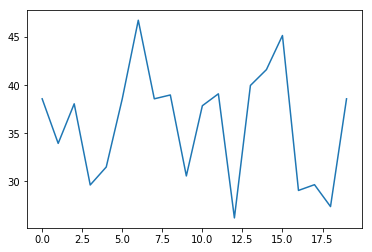

In [141]:
plt.plot(topevents_df.index.values, topevents_df['Total fee'])

In [142]:
D_likelyusers[81][:10]
#PersonIDs for which the given EventID is in their Top 10 recommendations

[10150, 10151, 9950, 10179, 10066, 10067, 10185, 10192, 10193, 10200]

In [143]:
likelyusers_event81_df = pd.DataFrame({'EventID': 81, 'PersonID': D_likelyusers[81]})
likelyusers_event81_df.head()

,EventID,PersonID
0,81,10150
1,81,10151
2,81,9950
3,81,10179
4,81,10066


In [144]:
likelyusers_event81_df = pd.merge(likelyusers_event81_df, cleaned_data, on='PersonID')

In [145]:
likelyusers_event81_df = likelyusers_event81_df[['PersonID', 'Gender', 'Age2', 'Zip Code', 'EventID_x']]

In [146]:
likelyusers_event81_df.drop_duplicates(subset='PersonID', inplace=True)

In [147]:
likelyusers_event81_df.head()

,PersonID,Gender,Age2,Zip Code,EventID_x
0,10150,Female,45.0,98008,81
4,10151,Female,25.0,98109,81
8,9950,Female,34.0,76426,81
9,10179,Female,29.0,98117,81
12,10066,Male,46.0,55364,81


In [148]:
tot_recs = float(len(likelyusers_event81_df))
print('Number of Top 5 Recommendations Users for Event 81, Seward Sizzler: {}'.format(tot_recs))

Number of Top 5 Recommendations Users for Event 81, Seward Sizzler: 4283.0


In [158]:
print('Percent Male/Female Recommended for Race 81, Seward Sizzler: {}, {}'.format(
    (likelyusers_event81_df[likelyusers_event81_df['Gender'] == 'Male'].count()['PersonID'])/tot_recs, 
    (likelyusers_event81_df[likelyusers_event81_df['Gender'] == 'Female'].count()['PersonID'])/tot_recs))

Percent Male/Female Recommended for Race 81, Seward Sizzler: 0.417931356526, 0.579033387812


In [150]:
tot_males = float(cleaned_data[cleaned_data['Gender'] == 'Male'].drop_duplicates('PersonID').count()['PersonID'])
tot_males

4530.0

In [151]:
tot_females = float(cleaned_data[cleaned_data['Gender'] == 'Female'].drop_duplicates('PersonID').count()['PersonID'])
tot_females

6217.0

In [152]:
print('Percent Male/Female in Total Population: {}, {}'.format(
    (tot_males / (tot_males+tot_females)), (tot_females / (tot_males+tot_females))))

Percent Male/Female in Total Population: 0.421512980367, 0.578487019633


In [159]:
print('Average Age Recommended for Race 81, Seward Sizzler: {}'.format(
    round(likelyusers_event81_df['Age2'].mean(), 1)))

Average Age Recommended for Race 81, Seward Sizzler: 35.0


In [155]:
print('Average Age in Total Population: {}'.format(
    round(cleaned_data['Age2'].mean(), 1)))

Average Age in Total Population: 37.4


## Ensemble rank score is worse than each individual ALS model's score from the test set:

* Ensemble: 7.2645672521985833 on Train, 18.517767702087443 on Test


* Series ALS: 1.53641759679 on Train, 4.8609993163 on Test
* Event Type ALS: 0.00684473620581 on Train, 0.41742084036 on Test
* Venue ALS: 6.5784112444 on Train, 13.3852376048 on Test
* Avg Fee ALS: 6.02542849691 on Train, 14.875102889 on Test
* Avg Miles ALS: 2.24288129789 on Train, 10.1237046386 on Test

#### Try a naive approach to ensembling, just averaging the input predictions from each ALS for each person to compare that score to the GB score

#### On Train Data:

In [160]:
gb_train_data.head()

,PersonID,EventID,Participated,Event_Date,SeriesID_prediction,EventTypeID_prediction,Venue_Zip_prediction,Total_Fee_Avg_prediction,Miles2_Avg_prediction
0,878,1000,0,1418428800000000000,0.000000,0.016062,0.022705,0.076895,0.210406
1,2,1000,0,1418428800000000000,0.638002,0.027481,0.009063,0.122730,0.220653
2,3,1000,0,1418428800000000000,1.146692,0.016062,0.010560,0.122303,0.210406
3,4,1000,0,1418428800000000000,0.555198,0.016062,0.908728,0.065251,0.556510
4,5,1000,0,1418428800000000000,0.410271,0.027481,0.027555,0.899697,0.940640


In [161]:
naive_train_ensemble = gb_train_data.copy()

In [162]:
naive_train_ensemble['prediction'] = (naive_train_ensemble['SeriesID_prediction'] +
                                      naive_train_ensemble['EventTypeID_prediction'] +
                                      naive_train_ensemble['Venue_Zip_prediction'] +
                                      naive_train_ensemble['Total_Fee_Avg_prediction'] +
                                      naive_train_ensemble['Miles2_Avg_prediction']) / 5.

In [163]:
naive_train_ensemble.drop(['Event_Date', 'SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 
                          'Total_Fee_Avg_prediction', 'Miles2_Avg_prediction'], axis=1, inplace=True)

In [164]:
naive_train_ensemble.head()

,PersonID,EventID,Participated,prediction
0,878,1000,0,0.065213
1,2,1000,0,0.203586
2,3,1000,0,0.301205
3,4,1000,0,0.420350
4,5,1000,0,0.461129


In [165]:
rank_processing_naive_train = rank_eval.RankEval(naive_train_ensemble, 'PersonID', 'EventID', 'Participated', 'prediction')

In [166]:
rank_processing_naive_train.calc_test_rank()

1.7146252451960124

In [167]:
rank_processing_naive_train.calc_popular_rank()

32.596883134541969

#### On Test Data:

In [176]:
gb_test_data.head()

,PersonID,EventID,Participated,Event_Date,SeriesID_prediction,EventTypeID_prediction,Venue_Zip_prediction,Total_Fee_Avg_prediction,Miles2_Avg_prediction
0,7673,1009,0,1464393600000000000,0.555198,0.016062,0.000000,0.107571,0.192870
1,10039,1009,0,1464393600000000000,0.555198,0.016062,0.843317,0.078619,0.217594
2,10141,1009,0,1464393600000000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,10143,1009,0,1464393600000000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,10144,1009,0,1464393600000000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [177]:
naive_test_ensemble = gb_test_data.copy()

In [178]:
naive_test_ensemble['prediction'] = (naive_test_ensemble['SeriesID_prediction'] +
                                     naive_test_ensemble['EventTypeID_prediction'] +
                                      naive_test_ensemble['Venue_Zip_prediction'] +
                                      naive_test_ensemble['Total_Fee_Avg_prediction'] +
                                      naive_test_ensemble['Miles2_Avg_prediction']) / 5.

In [179]:
naive_test_ensemble.drop(['Event_Date', 'SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 
                          'Total_Fee_Avg_prediction', 'Miles2_Avg_prediction'], axis=1, inplace=True)

In [180]:
naive_test_ensemble.head()

,PersonID,EventID,Participated,prediction
0,7673,1009,0,0.174340
1,10039,1009,0,0.342158
2,10141,1009,0,0.000000
3,10143,1009,0,0.000000
4,10144,1009,0,0.000000


In [181]:
rank_processing_naive_test = rank_eval.RankEval(naive_test_ensemble, 'PersonID', 'EventID', 'Participated', 'prediction')

In [182]:
rank_processing_naive_test.calc_test_rank()

56.998913703674489

In [183]:
rank_processing_naive_test.calc_popular_rank()

31.453857791225417